### MINI PROJECT

###  Model Johnson&Johnson Quarterly Earnings Per Share using Auto Regressive Model

In [10]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.regression.linear_model import yule_walker
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

%matplotlib inline

In [4]:
plt.rcParams['figure.figsize'] = (10, 7.5)

In [11]:
data = pd.read_csv('jj.csv')
data.head()

,date,data
0,1960-01-01,0.71
1,1960-04-01,0.63
2,1960-07-02,0.85
3,1960-10-01,0.44
4,1961-01-01,0.61


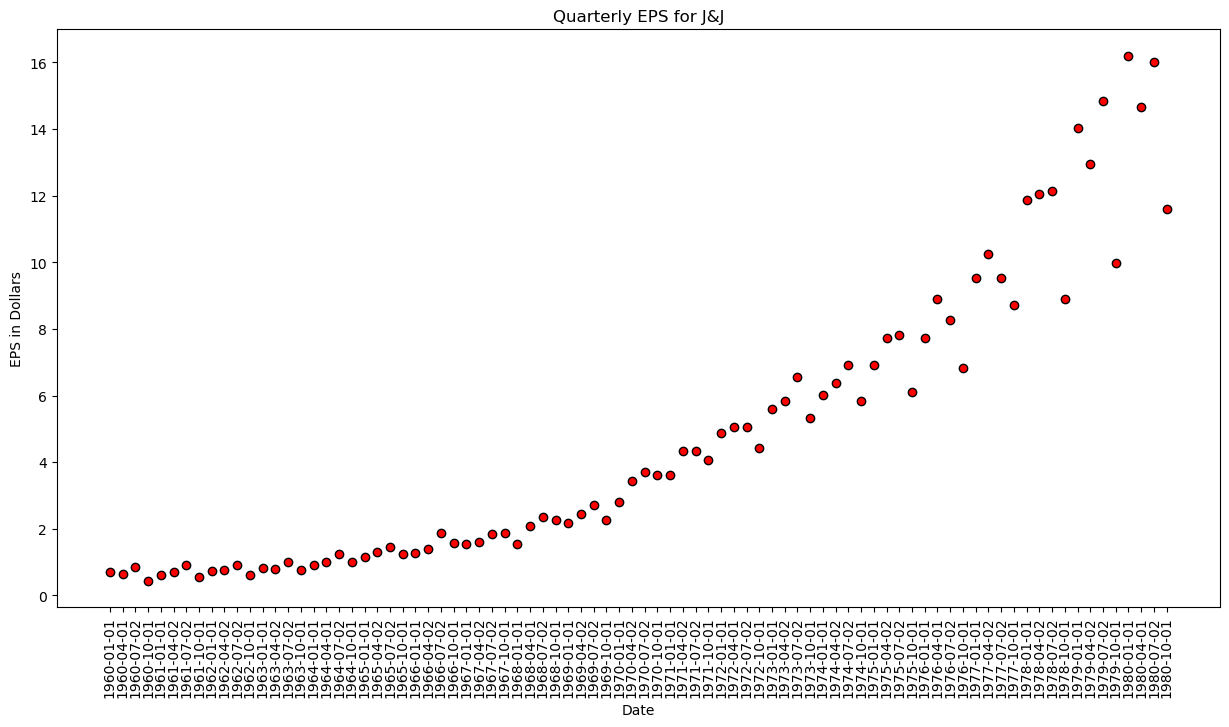

In [19]:
plt.figure(figsize=[15, 7.5])
plt.scatter(data['date'], data['data'], color='red', edgecolor='black')
plt.title('Quarterly EPS for J&J')
plt.ylabel('EPS in Dollars')
plt.xlabel('Date')
plt.xticks(rotation=90)
plt.show()

In [20]:
data['data'] = np.log(data['data'])
data['data'] = data['data'].diff()
data = data.drop(data.index[0])

data.head()

,date,data
1,1960-04-01,-0.119545
2,1960-07-02,0.299517
3,1960-10-01,-0.658462
4,1961-01-01,0.326684
5,1961-04-02,0.123233


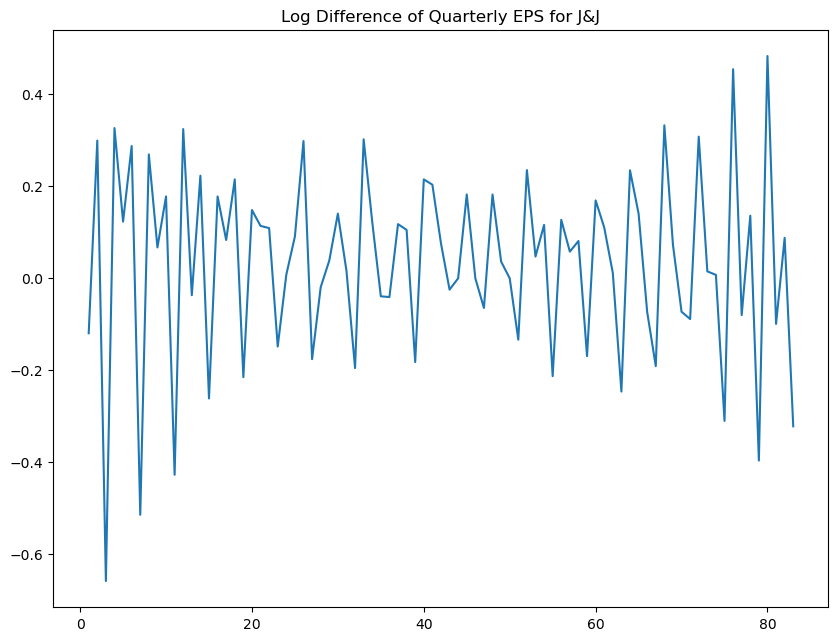

In [21]:
plt.plot(data['data'])
plt.title('Log Difference of Quarterly EPS for J&J')
plt.show()

In [22]:
ad_fuller_result = adfuller(data['data'])

print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')

ADF Statistic: -4.317043945811826
p-value: 0.0004149731404440838


### Therefore a good fit 

C:\Users\alkaa\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


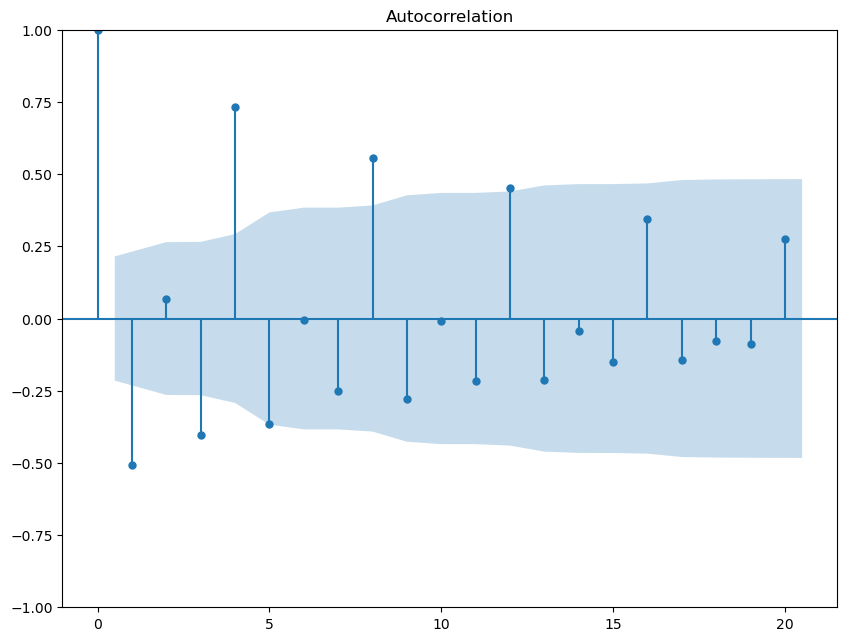

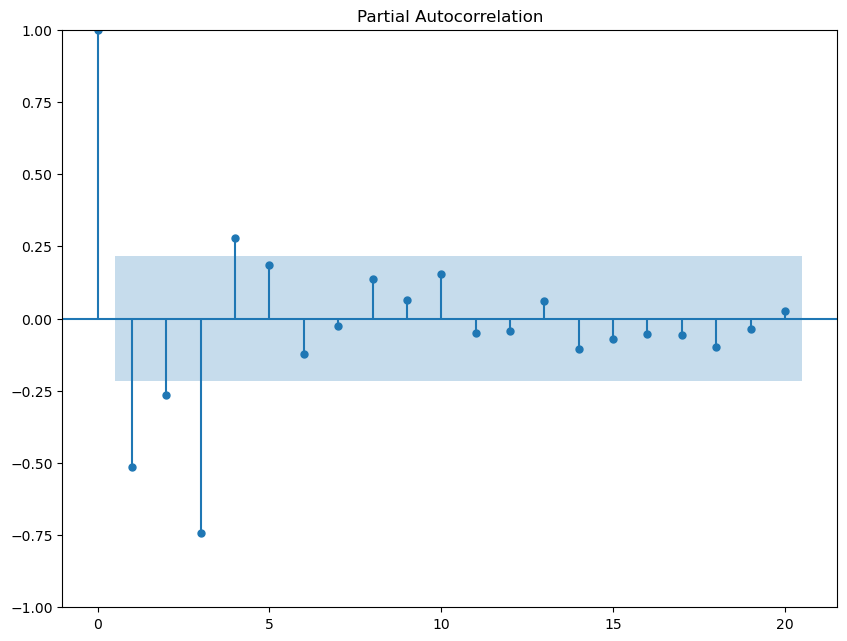

In [23]:
plot_acf(data['data']);
plot_pacf(data['data']);

### Trying AR4

In [24]:
rho, sigma = yule_walker(data['data'], 4)

print(f'rho: {-rho}')
print(f'sigma: {sigma}')

rho: [ 0.63642644  0.5364386   0.50578018 -0.27991345]
sigma: 0.11132979178317175
